In [1]:
import os
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression    
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
data = pd.read_csv('out.csv')
data.head()

,index,content,class
0,inmail.10,hi...i have to use r to find out the 90% confi...,0.0
1,inmail.1000,"larry king live at 9:00 p.m. eton monday, apri...",0.0
2,inmail.10002,"francesco poli wrote:> on sun, 15 apr 2007 21:...",0.0
3,inmail.10011,stephen thorne wrote:> what i was thinking was...,0.0
4,inmail.10014,"bonjour, je vous cris pour savoir si vous avi...",0.0


In [2]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=LemmaTokenizer())
v = vectorizer.fit_transform(data['content'].astype('U').values)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  sorted(inconsistent))


In [7]:
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression()
#matrix = v.transform(data['content']) 
X = v;
Y = data["class"].fillna(0).astype(int);
scores_clf_svc_cv = cross_val_score(log_model,X,Y,scoring='accuracy',cv=10)
print(scores_clf_svc_cv.mean())

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9482145444072982


In [12]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), 
      "penalty":['l1','l2']}# l1 lasso l2 ridge
gd_sr = GridSearchCV(estimator=log_model, param_grid=grid, scoring='accuracy',cv=10, n_jobs=-1)   #-1 means the software uses all available cpus
gd_sr.fit(X, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 10.0, 'penalty': 'l1'}


In [23]:
log_model2 = LogisticRegression(C= 10.0, penalty='l1',solver='liblinear')
scores_clf_svc_cv = cross_val_score(log_model2,X,Y,scoring='accuracy',cv=10)
print(scores_clf_svc_cv.mean())

0.9524727768927732


In [24]:
scores_clf_svc_cv = cross_val_score(log_model2,X,Y,scoring='roc_auc',cv=10)
print(scores_clf_svc_cv.mean())

0.984275467821257


In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size =0.1) 
log_model.fit(X_train, Y_train)
Y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for LogisticRegression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 640x480 with 1 Axes>

In [9]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
scores1 = cross_val_score(gnb, X, Y, cv = 10, scoring = 'accuracy')
roc_score = cross_val_score(gnb, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())
print(roc_score.mean())

0.9404700632717393
0.9836830139671806


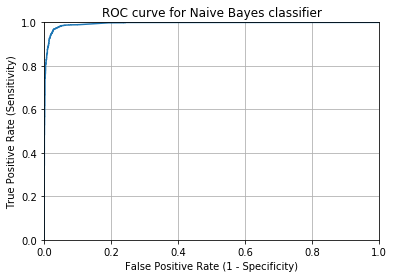

In [10]:
gnb.fit(X_train, Y_train)
Y_pred_prob = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Naive Bayes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [21]:
# multilanguage
# 2-gram
# lemmnization
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores1 = cross_val_score(neigh, X, Y, cv = 10, scoring = 'accuracy')
roc_score = cross_val_score(neigh, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())
print(roc_score.mean())

0.8553365611828196
0.9241783480937734


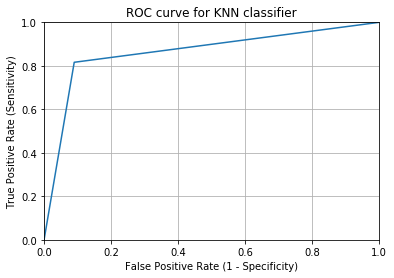

In [20]:
neigh.fit(X_train, Y_train)
Y_pred_prob = neigh.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
'''from sklearn.model_selection import GridSearchCV
grid={"n_neighbors":list(range(1, 11))}
gd_sr = GridSearchCV(estimator=neigh, param_grid=grid, scoring='accuracy',cv=10, n_jobs=-1)   #-1 means the software uses all available cpus
gd_sr.fit(X, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)'''

In [ ]:
'''from sklearn import svm
from sklearn.svm import SVC
SVM = svm.SVC()
scores1 = cross_val_score(SVM, X, Y, cv = 3, scoring = 'accuracy')
roc_score = cross_val_score(SVM, X, Y, cv = 3, scoring = 'roc_auc')
print(scores1.mean())
print(roc_score.mean())
#param_grid = {'C': [1, 10, 100, 1000], 
#              'gamma': [0.001, 0.000005, 0.0001], 
#              'kernel': ['rbf','linear','poly','sigmoid', 'precomputed'],
#              'degree':[2,3,4]}
#clf= GridSearchCV(SVM, param_grid, cv=10, scoring='accuracy')
#clf.fit(X, Y)
#best_params = clf.best_params_
#print(best_params)'''

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'accuracy')
roc_score = cross_val_score(clf, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())
print(roc_score.mean())

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

0.9437631243808914
0.9745713297211077


In [ ]:
'''from sklearn.model_selection import GridSearchCV
grid_param = { 
    'n_estimators': [10, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
gd_sr = GridSearchCV(estimator=clf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)   #-1 means the software uses all available cpus
gd_sr.fit(X, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)''' 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


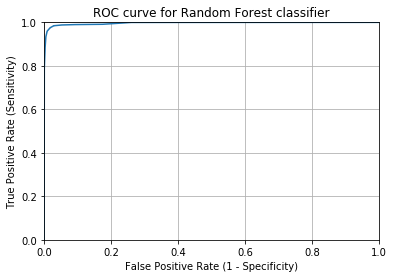

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size =0.1) 
clf.fit(X_train, Y_train)
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()